In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
# Generate synthetic data
def generate_data(num_samples=1000):
    # Normal data
    x_normal = np.random.normal(0, 1, (num_samples, 20))
    # Anomalies
    x_anomalies = np.random.normal(5, 1, (50, 20))
    return np.vstack([x_normal, x_anomalies]), np.array([0] * num_samples + [1] * 50)

#

In [3]:
# Load and preprocess data
data, labels = generate_data()
scaler = StandardScaler()
data = scaler.fit_transform(data)
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)


In [4]:
# Build the Autoencoder model
input_dim = x_train.shape[1]
model = models.Sequential()
model.add(layers.Input(shape=(input_dim,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(input_dim, activation='sigmoid'))


In [5]:
# Compile the model
model.compile(optimizer='adam', loss='mse')


In [6]:
# Train the model
model.fit(x_train, x_train, epochs=50, batch_size=32, validation_data=(x_test, x_test))


Epoch 1/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 1.0773 - val_loss: 1.1995
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.9426 - val_loss: 0.9184
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.7775 - val_loss: 0.8349
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.7028 - val_loss: 0.8237
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.7087 - val_loss: 0.8223
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.7603 - val_loss: 0.8215
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.6408 - val_loss: 0.8208
Epoch 8/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.6928 - val_loss: 0.8201
Epoch 9/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.7582 - val_loss: 0.8191
Epoch 10/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.6846 - val_loss: 0.8178
Epoch 11/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.6955 - val_loss: 0.8151
Epoch 12/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.720

In [7]:
# Evaluate the model
reconstructed = model.predict(x_test)
mse = np.mean(np.power(x_test - reconstructed, 2), axis=1)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [8]:
# Set a threshold for anomaly detection
threshold = 3 * np.std(mse)


In [9]:
# Identify anomalies
y_pred = [1 if e > threshold else 0 for e in mse]

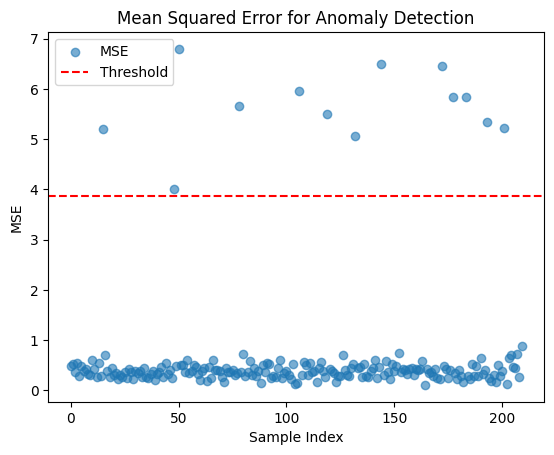

In [10]:
# Visualize the results
plt.scatter(range(len(mse)), mse, label='MSE', alpha=0.6)
plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold')
plt.title('Mean Squared Error for Anomaly Detection')
plt.xlabel('Sample Index')
plt.ylabel('MSE')
plt.legend()
plt.show()